Command Profile in TVB
----------------------

This is a simple demo showing for to interract with TVB in the command profile.

More examples can be found here:
https://github.com/the-virtual-brain/tvb-framework/tree/master/tvb/interfaces/command/demos

In [1]:
from tvb.interfaces.command.lab import *

2022-05-09 13:03:00,389 - WARNING - tvb.config.init.introspector_registry - Skipped Adapter(probably because MATLAB not found):<class 'tvb.adapters.analyzers.bct_adapters.DistanceDBIN'>
2022-05-09 13:03:00,392 - WARNING - tvb.config.init.introspector_registry - Skipped Adapter(probably because MATLAB not found):<class 'tvb.adapters.analyzers.bct_adapters.DistanceDWEI'>
2022-05-09 13:03:00,393 - WARNING - tvb.config.init.introspector_registry - Skipped Adapter(probably because MATLAB not found):<class 'tvb.adapters.analyzers.bct_adapters.DistanceNETW'>
2022-05-09 13:03:00,393 - WARNING - tvb.config.init.introspector_registry - Skipped Adapter(probably because MATLAB not found):<class 'tvb.adapters.analyzers.bct_adapters.DistanceRDA'>
2022-05-09 13:03:00,394 - WARNING - tvb.config.init.introspector_registry - Skipped Adapter(probably because MATLAB not found):<class 'tvb.adapters.analyzers.bct_adapters.DistanceRDM'>
2022-05-09 13:03:00,395 - WARNING - tvb.config.init.introspector_registr

In [2]:
list_projects()

                    name    id
         Default_Project     1


Create a new project to test with

In [3]:
proj = new_project("sandbox")

In [4]:
list_projects()

                    name    id
         Default_Project     1
                 sandbox     2


If you have the web UI open at the same time, you'll notice there's now a new project named "sandbox_project"

In [5]:
list_datatypes(proj.id)

                    type              tag    id                              gid         date


Nothing! Let's import a connectivity

In [6]:
import os
import tvb_data
p = os.path.join(os.path.dirname(tvb_data.__file__), 'connectivity/connectivity_66.zip')
import_op = import_conn_zip(proj.id, p)

import_op = wait_to_finish(import_op)
import_op

2022-05-09 13:03:11,956 - INFO - tvb.core.services.operation_service - Starting operation ZIPConnectivityImporter
2022-05-09 13:03:12,098 - INFO - tvb.core.services.backend_clients.standalone_client - Start processing operation id:36
2022-05-09 13:03:16,584 - INFO - tvb.core.services.backend_clients.standalone_client - Finished with launch of operation 36
2022-05-09 13:03:16,585 - INFO - tvb.core.services.backend_clients.standalone_client - Return code: 0. Stopped: False
2022-05-09 13:03:16,586 - INFO - tvb.core.services.backend_clients.standalone_client - Thread: <OperationExecutor(Thread-99, initial)>
2022-05-09 13:03:16,594 - INFO - tvb.core.services.operation_service - Finished operation launch:ZIPConnectivityImporter
2022-05-09 13:03:17,607 - INFO - tvb.interfaces.command.lab - Operation finished successfully


<Operation('cd7b42a6db21472db88349cbfbabeecd', 3c36f42e-cf7f-11ec-a292-782b46fbd208, 2,'2','30','2022-05-09 13:03:11.967339','2022-05-09 13:03:15.859654', '2022-05-09 13:03:16.241623','5-FINISHED',True, 'None', '2022-05-09,13-03-16', '', 0)>

In [7]:
list_operation_results(import_op.id)

              id                     type                              gid         date
              40        ConnectivityIndex 991e69590f784939b13257a164cd0985 2022-05-09 13:03:16.117650


Now let's grab that connectivity from the database. 
IMPORTANT: Make sure to adjust the DT gid below to match the value in the id column above and run a simulation with it.

In [8]:
simulator_model = SimulatorAdapterModel()
# ConnectivityIndex gid from the column above
simulator_model.connectivity = "991e69590f784939b13257a164cd0985"
simulator_model.simulation_length = 100
sim_op = fire_simulation(proj.id, simulator_model)
sim_op = wait_to_finish(sim_op)
sim_op

2022-05-09 13:03:30,952 - INFO - tvb.core.services.backend_clients.standalone_client - Start processing operation id:37
2022-05-09 13:03:30,972 - INFO - tvb.interfaces.command.lab - Operation launched ....
2022-05-09 13:03:44,037 - INFO - tvb.core.services.backend_clients.standalone_client - Finished with launch of operation 37
2022-05-09 13:03:44,040 - INFO - tvb.core.services.backend_clients.standalone_client - Return code: 0. Stopped: False
2022-05-09 13:03:44,041 - INFO - tvb.core.services.backend_clients.standalone_client - Thread: <OperationExecutor(Thread-124, started 18704)>
2022-05-09 13:03:44,204 - INFO - tvb.interfaces.command.lab - Operation finished successfully


<Operation('f707d005d46e4d09b579b6d734a2f43a', 470e2464-cf7f-11ec-9379-782b46fbd208, 2,'2','13','2022-05-09 13:03:30.154813','2022-05-09 13:03:41.283679', '2022-05-09 13:03:43.569259','5-FINISHED',True, 'None', '2022-05-09,13-03-43', '', 118.7998046875)>

We should wait for the simulation to finish, and afterwards, TimeSeries should also be part of this project.

Refresh the Web GUI to see the status of your operation.

In [9]:
list_operation_results(sim_op.id)

              id                     type                              gid         date
              42   SimulationHistoryIndex 0302ec051b2d4109a8f44053d874de87 2022-05-09 13:03:43.194631
              43    TimeSeriesRegionIndex 4ecaf6bd59d04084886de6e3afd47e10 2022-05-09 13:03:43.438889


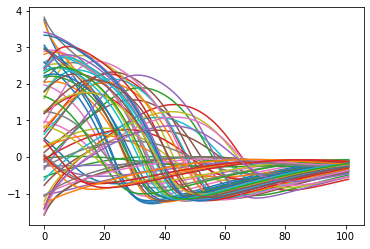

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

# Use TimeSeriesRegionIndex id
ts  = load_dt(43)
for reg in range(66):
    plt.plot(ts.data[:, 0, reg, 0])
plt.show()

You can re-evaluate this cell multiple times while it's running to see how the results gradually show up as the simulation finishes.